# Loading

In [1]:
!pip install scanpy
!pip install bbknn
!pip3 install leidenalg
import scanpy as sc

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 21.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.0/103.0 kB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 kB 9.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 61.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.5/63.5 kB 6.4 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82816 sha256=ff3808de8fd3611b4f77918f0dedf3960e0a95e0a04c39cd563b4b734896c561
  Stored in directory: /root/.cache/pip/wheels/a0/e8/c6/a37ea663620bd5200ea1ba0907ab3c217042c1d035ef606acc
  Created wheel for session-info: filename=session_info-1.0.0-py3-none-any.whl size=8026 sha256=07a1fc589084689f28

# 在zzm数据集上进行测试

In [2]:
adata_Cancer = sc.read_h5ad('/content/drive/MyDrive/Gastric/Cancer/Data/Gastric_Cancer_cluster.h5ad')

/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


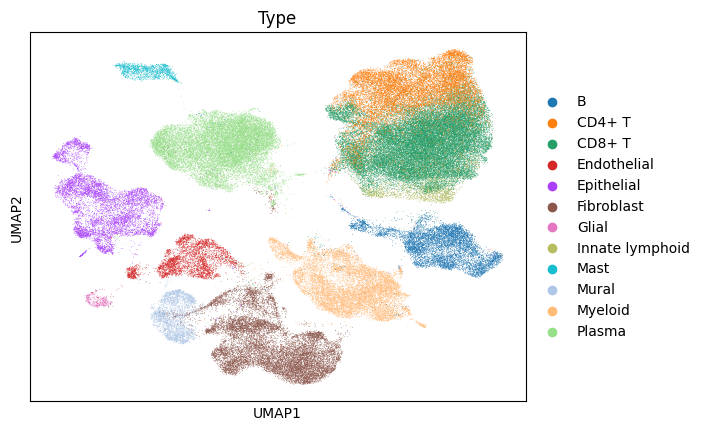

In [3]:
sc.pl.umap(adata_Cancer,color=['Type'])

In [4]:
adata_Cancer_CD8 = adata_Cancer[adata_Cancer.obs['Type']=='CD8+ T']
adata_Cancer_CD8 = adata_Cancer_CD8.raw.to_adata()
adata_Cancer_CD8

AnnData object with n_obs × n_vars = 31705 × 25287
    obs: 'Sample', 'Patient', 'Tissue', 'Platform', 'Subtype', 'Type', 'Annotation', '_scvi_batch', '_scvi_labels', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden'
    var: 'gene_ids', 'feature_types', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'Sample_colors', 'Type_colors', '_scvi_manager_uuid', '_scvi_uuid', 'dendrogram_Type', 'hvg', 'leiden', 'leiden_sizes', 'log1p', 'neighbors', 'paga', 'umap'
    obsm: 'X_pca', 'X_scVI', 'X_umap', '_scvi_extra_categorical_covs', '_scvi_extra_continuous_covs'
    obsp: 'connectivities', 'distances'

/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


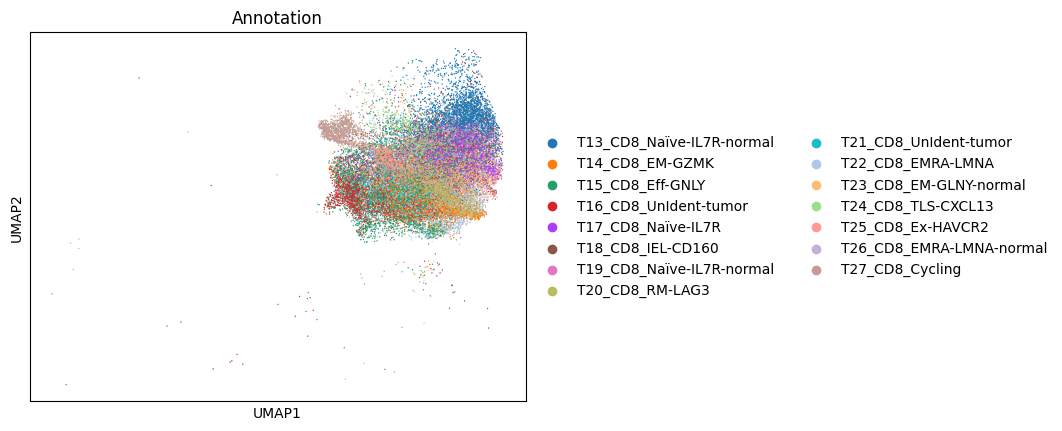

In [5]:
sc.pl.umap(adata_Cancer_CD8,color=['Annotation'])

In [6]:
#sc.tl.pca(adata, n_comps=100, svd_solver="arpack")
sc.pp.neighbors(adata_Cancer_CD8, use_rep="X_scVI", metric="cosine",n_neighbors=20, random_state = 112)
sc.tl.leiden(adata_Cancer_CD8)
sc.tl.paga(adata_Cancer_CD8)
sc.pl.paga(adata_Cancer_CD8, plot=False)  # remove `plot=False` if you want to see the coarse-grained graph
sc.tl.umap(adata_Cancer_CD8,init_pos='paga')

/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


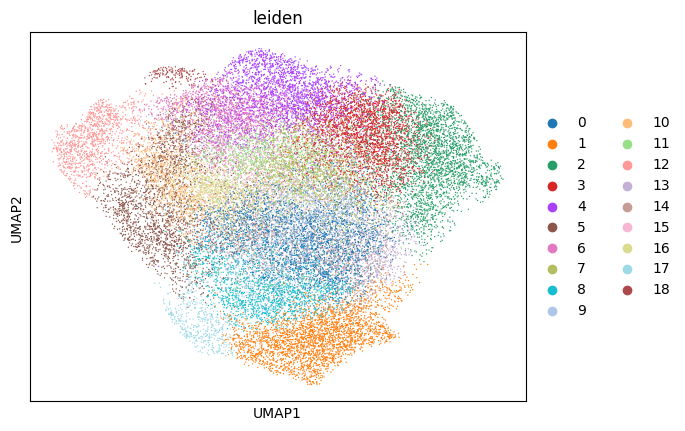

In [10]:
sc.pl.umap(adata_Cancer_CD8,color=['leiden'])

In [20]:
marker_genes_dict = {
'CD8.MAIT':['SLC4A10','TRAV1-2','DPP4','IL4I1','KLRB1','RORC','ZBTB16','KLRB1','NCR3','RORA'],
'CD8.Exhausted':['TIGIT','CTLA4','HAVCR2','LAG3'] #'SLC4A10','CCR6','DPP4','IL4I1','KLRB1','RORC','ZBTB16','KLRB1','NCR3','RORA' 
}

categories: 0, 1, 2, etc.
var_group_labels: CD8.MAIT, CD8.Exhausted


/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


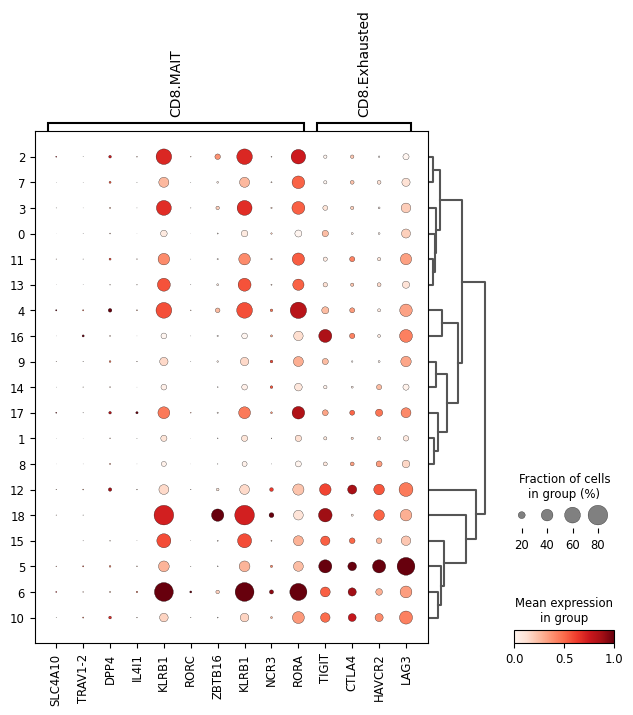

In [21]:
sc.pl.dotplot(adata_Cancer_CD8, marker_genes_dict, 'leiden' ,standard_scale='var', dendrogram=True)

/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


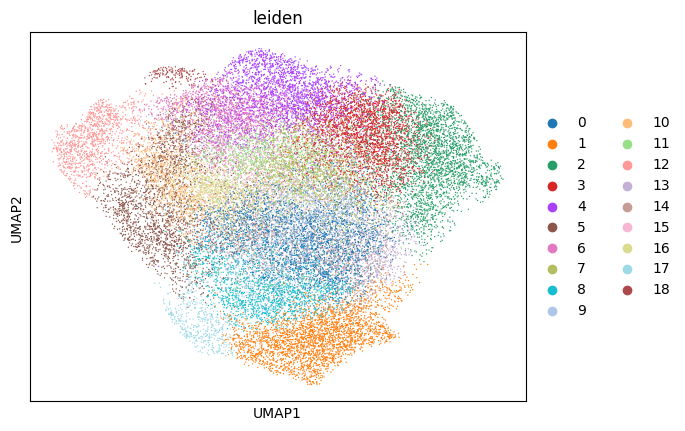

In [17]:
sc.pl.umap(adata_Cancer_CD8,color=['leiden'])

# 在自己数据集上测试MAIT细胞Marker分布

MAIT细胞标志基因来源文献：https://www.frontiersin.org/files/Articles/700152/fimmu-12-700152-HTML/image_m/fimmu-12-700152-g001.jpg


In [68]:
adata = sc.read('/content/drive/MyDrive/Gastric/NKT/Data/Gastric_NKT_anno.h5ad')
adata

AnnData object with n_obs × n_vars = 14023 × 2000
    obs: 'Group_number', 'Sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', '_scvi_batch', '_scvi_labels', 'leiden', 'major_celltype', 'Person', 'T/NK_celltype', 'T/NK_type'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'Group_number_colors', 'Person_colors', 'Sample_colors', 'T', '_scvi_manager_uuid', '_scvi_uuid', 'dendrogram_Group_number', 'dendrogram_T', 'dendrogram_leiden', 'dendrogram_major_celltype', 'hvg', 'leiden', 'leiden_colors', 'leiden_sizes', 'log1p', 'major_celltype_colors', 'neighbors', 'paga', 'pca', 'umap'
    obsm: 'X_pca', 'X_scVI', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [23]:
marker_genes_dict = {
'CD8.MAIT':['SLC4A10','TRAV1-2'],
'CD8.Exhausted':['TIGIT','CTLA4','HAVCR2','LAG3'] #'SLC4A10','CCR6','DPP4','IL4I1','KLRB1','RORC','ZBTB16','KLRB1','NCR3','RORA' 
}

/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


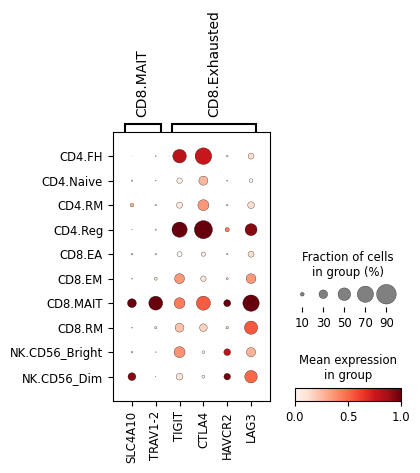

In [26]:
sc.pl.dotplot(adata, marker_genes_dict, 'T/NK_celltype' ,standard_scale='var', dendrogram=False)

In [71]:
adata_all = sc.read_h5ad('/content/drive/MyDrive/Gastric/Data/Gastric_anno.h5ad')
adata_all

AnnData object with n_obs × n_vars = 63398 × 2000
    obs: 'Group_number', 'Sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', '_scvi_batch', '_scvi_labels', 'leiden', 'major_celltype', 'Person'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'Group_number_colors', 'Person_colors', 'Sample_colors', '_scvi_manager_uuid', '_scvi_uuid', 'dendrogram_Group_number', 'dendrogram_leiden', 'dendrogram_major_celltype', 'hvg', 'leiden', 'leiden_colors', 'leiden_sizes', 'log1p', 'major_celltype_colors', 'neighbors', 'paga', 'pca', 'umap'
    obsm: 'X_pca', 'X_scVI', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [72]:
new_list = [x for x in adata_all.obs.index if x not in adata.obs.index]
print(new_list)

['AAACCTGAGACCTAGG-1_0', 'AAACCTGAGACGCACA-1_0', 'AAACCTGAGCTCCTCT-1_0', 'AAACCTGAGGCTCAGA-1_0', 'AAACCTGCACTTAAGC-1_0', 'AAACCTGCAGACGCAA-1_0', 'AAACCTGGTAAGCACG-1_0', 'AAACCTGGTACAGTGG-1_0', 'AAACCTGGTATTAGCC-1_0', 'AAACCTGGTCGCGGTT-1_0', 'AAACCTGGTCTAAACC-1_0', 'AAACCTGGTGACTCAT-1_0', 'AAACCTGGTTCCATGA-1_0', 'AAACCTGTCGGCGCTA-1_0', 'AAACCTGTCGTACGGC-1_0', 'AAACCTGTCTGTCTAT-1_0', 'AAACCTGTCTTGAGGT-1_0', 'AAACGGGAGAAGAAGC-1_0', 'AAACGGGAGGATATAC-1_0', 'AAACGGGCAAGACGTG-1_0', 'AAACGGGCAAGCGATG-1_0', 'AAACGGGCATCACGTA-1_0', 'AAACGGGCATGGGAAC-1_0', 'AAACGGGGTGGTCTCG-1_0', 'AAACGGGGTTACGCGC-1_0', 'AAACGGGTCACATGCA-1_0', 'AAACGGGTCAGGCGAA-1_0', 'AAACGGGTCAGTCCCT-1_0', 'AAAGATGAGAGTGACC-1_0', 'AAAGATGCAGTCCTTC-1_0', 'AAAGATGTCAGTTAGC-1_0', 'AAAGATGTCTGCCAGG-1_0', 'AAAGCAAAGCATCATC-1_0', 'AAAGCAAAGCTCAACT-1_0', 'AAAGCAAAGGGAACGG-1_0', 'AAAGCAACATCTCCCA-1_0', 'AAAGCAAGTAAGGGCT-1_0', 'AAAGCAAGTCTAGCGC-1_0', 'AAAGCAAGTCTCTTTA-1_0', 'AAAGCAATCAAGCCTA-1_0', 'AAAGCAATCACCAGGC-1_0', 'AAAGCAATCACGCG

In [76]:
adata_all = adata_all[new_list]
adata_all.obs['T/NK_celltype'] = adata_all.obs['major_celltype']

<ipython-input-76-34c96ef599d4>:2: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_all.obs['T/NK_celltype'] = adata_all.obs['major_celltype']


In [77]:
adata.obs.index

Index(['AAACCTGCATCCAACA-1_0', 'AAACCTGGTACACCGC-1_0', 'AAACGGGCAATAACGA-1_0',
       'AAACGGGGTACAGCAG-1_0', 'AAAGATGTCTCGCTTG-1_0', 'AAAGCAAAGGTAGCTG-1_0',
       'AAAGCAAGTGACTCAT-1_0', 'AAAGCAATCGAACTGT-1_0', 'AAAGTAGCAGTAAGAT-1_0',
       'AAAGTAGGTACATCCA-1_0',
       ...
       'TTTCCTCAGGCACATG-1_11', 'TTTCCTCGTGAACCTT-1_11',
       'TTTCCTCTCAAGATCC-1_11', 'TTTGCGCAGTGAACAT-1_11',
       'TTTGCGCCACTCGACG-1_11', 'TTTGCGCGTCCATCCT-1_11',
       'TTTGGTTAGTACGCCC-1_11', 'TTTGTCACAAGACACG-1_11',
       'TTTGTCAGTGTAACGG-1_11', 'TTTGTCATCTGCAAGT-1_11'],
      dtype='object', length=14023)

In [78]:
import anndata as ad
adata_concat = ad.concat([adata_all,adata])
adata_concat

AnnData object with n_obs × n_vars = 63398 × 2000
    obs: 'Group_number', 'Sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', '_scvi_batch', '_scvi_labels', 'leiden', 'major_celltype', 'Person', 'T/NK_celltype'
    obsm: 'X_pca', 'X_scVI', 'X_umap'
    layers: 'counts'

耗竭基因参考文献：

https://www.frontiersin.org/articles/10.3389/fimmu.2018.00472/full


MAIT细胞活化参考文献：

https://www.nature.com/articles/s41590-021-00870-z

In [87]:
marker_genes_dict = {
'CD8.MAIT':['SLC4A10','TRAV1-2'],
'CD8.Exhausted':['TIGIT','CTLA4','HAVCR2','LAG3','PDCD1'] #'SLC4A10','CCR6','DPP4','IL4I1','KLRB1','RORC','ZBTB16','KLRB1','NCR3','RORA' 
}

/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


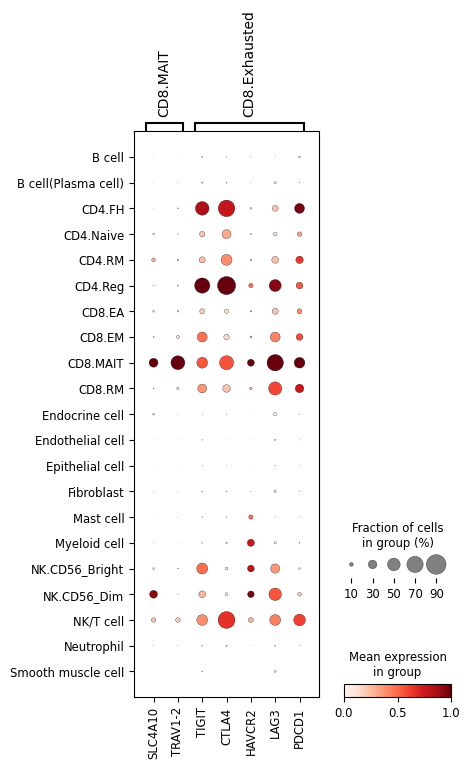

In [88]:
sc.pl.dotplot(adata_concat, marker_genes_dict, 'T/NK_celltype' ,standard_scale='var', dendrogram=False)

In [ ]:
sc.pl.dotplot(adata_concat, marker_genes_dict, 'T/NK_celltype' ,standard_scale='var', dendrogram=False)

In [50]:
adata.obs.loc[adata.obs.index]

,Group_number,Sample,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,_scvi_batch,_scvi_labels,leiden,major_celltype,Person,T/NK_celltype,T/NK_type
AAACCTGCATCCAACA-1_0,DYM,Pos,1379,1379,3166.0,162.0,5.116867,0,0,0,NK/T cell,Pos_1,CD8.EM,CD8
AAACCTGGTACACCGC-1_0,DYM,Pos,1557,1557,3217.0,85.0,2.642213,0,0,3,NK/T cell,Pos_1,CD4.Naive,CD4
AAACGGGCAATAACGA-1_0,DYM,Pos,1562,1562,3786.0,222.0,5.863708,0,0,2,NK/T cell,Pos_1,CD8.RM,CD8
AAACGGGGTACAGCAG-1_0,DYM,Pos,1740,1740,4942.0,123.0,2.488871,0,0,1,NK/T cell,Pos_1,CD4.RM,CD4
AAAGATGTCTCGCTTG-1_0,DYM,Pos,4214,4214,15736.0,1154.0,7.333503,0,0,6,NK/T cell,Pos_1,NK.CD56_Bright,NK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGCGCGTCCATCCT-1_11,PC09,Para,1400,1400,3996.0,238.0,5.955956,5,0,10,NK/T cell,Para_2,CD8.RM,CD8
TTTGGTTAGTACGCCC-1_11,PC09,Para,401,401,737.0,181.0,24.559023,5,0,1,NK/T cell,Para_2,CD4.RM,CD4
TTTGTCACAAGACACG-1_11,PC09,Para,1484,1484,3364.0,135.0,4.013080,5,0,0,NK/T cell,Para_2,CD8.EM,CD8
TTTGTCAGTGTAACGG-1_11,PC09,Para,1530,1530,3664.0,410.0,11.189957,5,0,0,NK/T cell,Para_2,CD8.EM,CD8


# 所有参考文献

https://genomebiology.biomedcentral.com/articles/10.1186/s13059-022-02828-2#Sec15（张泽民老师）


https://journals.aai.org/jimmunol/article/208/5/1042/234870/Single-Cell-Transcriptional-Profiling-Reveals

https://www.nature.com/articles/s41590-019-0444-8/

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8571139/

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC9012082/